In [339]:
!ls ../results/2025_04_analysis_qmin0.0025/2022-2/cluster_results_all/E0111_* | wc

   1197    1197  141246


In [379]:
import glob
import matplotlib.pyplot as plt
# flist = glob.glob("../results/2025_04_analysis_qmin0.0025/2022-2/cluster_results_all/E0110_*") # H06
flist = glob.glob("../results/2025_04_analysis/2021-2/cluster_results_all/H042_*") # H02
flist.sort()
print(len(flist))
print(flist[0])
print(flist[-1])

1450
../results/2025_04_analysis/2021-2/cluster_results_all/H042_VPAVG_H05_2_200C10p_att00_Rq0_00001_results.hdf
../results/2025_04_analysis/2021-2/cluster_results_all/H042_VPAVG_H05_2_200C10p_att00_Rq0_01450_results.hdf


In [380]:
from pyxpcsviewer import XpcsFile as XF
from tqdm import trange
import numpy as np

In [381]:
a = XF(flist[0])
q = a.saxs_1d["q"]
tau = a.tau * a.t0

In [382]:
g2 = []
for n in trange(0, len(flist)):
# for n in trange(0, 512):
    obj_tmp = XF(flist[n], fields=["g2"])
    g2.append(obj_tmp.g2)

100%|██████████████████████████████████████████████████████████████████████| 1450/1450 [02:43<00:00,  8.89it/s]


In [383]:
g2 = np.array(g2)
print(g2.shape)
print(tau.shape)

(1450, 61, 27)
(61,)


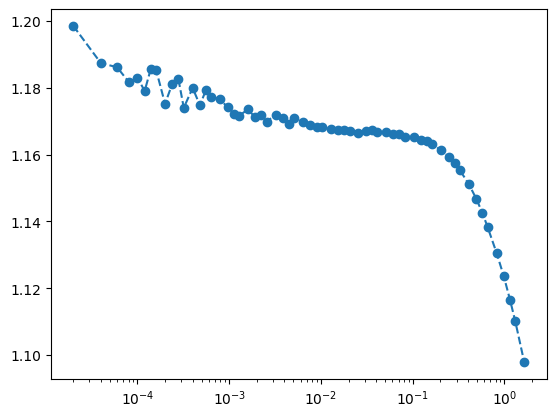

In [388]:
plt.semilogx(tau, np.mean(g2[:, :, 4], axis=0), '--o')

In [389]:
def get_g2_avg(g2, n=100):
    data = g2[0:n]
    # print(data.shape)
    avg = np.nanmean(data, axis=0)
    err = np.nanstd(data, axis=0) / np.sqrt(data.shape[0])
    return avg, err

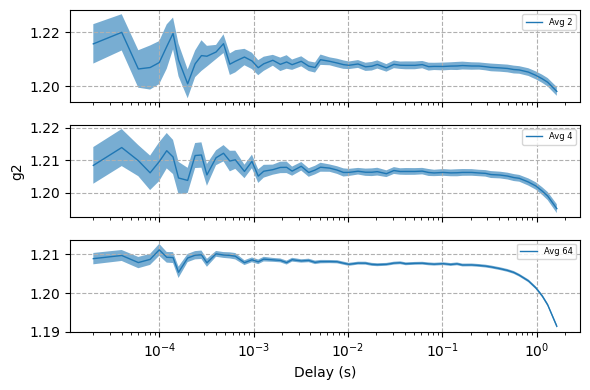

In [431]:

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 4), sharex=True)

size = [2, 4, 64]
for ax_n, n in enumerate(size):
    avg, err = get_g2_avg(g2[:, :, 1], (n + 1) * 10)
    q_down = q[::1]
    avg_down = avg[::1]
    err_down = err[::1]

    ax = axes[ax_n]
    ax.plot(tau, avg_down, linewidth=1, label=f'Avg {n}')
    ax.fill_between(tau, avg_down - err_down, avg_down + err_down, alpha=0.6)

    ax.set_xscale('log')
    
    ax.legend(fontsize=6)
    ax.grid(True, which='major', ls='--')
    
axes[1].set_ylabel('g2')
axes[-1].set_xlabel('Delay (s)')
# fig.suptitle('SAXS Measurements with Shaded Error (Log Y Scale)', y=1.02)
fig.tight_layout()
plt.savefig("g2_study.png", dpi=300)
plt.show()



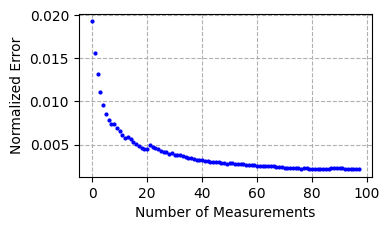

In [428]:
data = []
fig, ax = plt.subplots(1, 1, figsize=(4, 2.4))
for n in range(2, 100):
    # avg, err = get_saxs_avg(Iq_sp, (n + 1) * 2)
    avg, err = get_g2_avg(g2[:, :, 0], n + 1)
    rel_err = err / avg
    data.append(rel_err)

data = np.array(data)
# plt.plot(data[:, 0]) 
# plt.plot(data[:, 6]) 
ax.plot(np.max(data, axis=1), 'bo', ms=2)
ax.set_ylabel('Normalized Error')
ax.set_xlabel('Number of Measurements')
ax.grid(True, which='both', ls='--')
plt.tight_layout()
plt.savefig("g2_study2.png", dpi=300)

    # plt.errorbar(q[::3], avg[::3], yerr=err[::3], fmt='-', capsize=3, elinewidth=1, linewidth=1, label=f'Avg {2*(n+1)}')
# Set y-axis to log scale
# plt.yscale('log')

In [312]:
Iq_sp_log = np.copy(Iq_sp)
Iq_sp_log[Iq_sp_log <= 0] = 1 
Iq_sp_log = np.log(Iq_sp_log)
Iq_sp_log[Iq_sp_log == np.nan] = 0
print(np.sum(Iq_sp_log == np.nan))

0


(1198, 1)
0 0


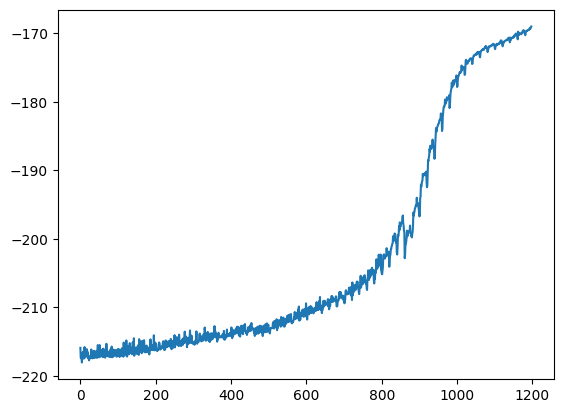

In [313]:
norm_dn = np.nanmean(Iq_sp_log, axis=1).reshape(-1, 1) * np.sqrt(Iq_sp_log.shape[1])
plt.plot(norm_dn)
print(norm_dn.shape)

# norm_dn[norm_dn == 0] = 1
# norm_dn[norm_dn == np.nan] = 1
norm = Iq_sp_log / norm_dn
norm[np.isnan(norm)] = 0
diff = np.matmul(norm, norm.T)
print(np.sum(Iq_sp_log == np.nan), np.sum(norm == np.nan))


In [314]:
print(np.nanmin(diff), np.nanmax(diff))

0.999944038022002 1.02547860851897


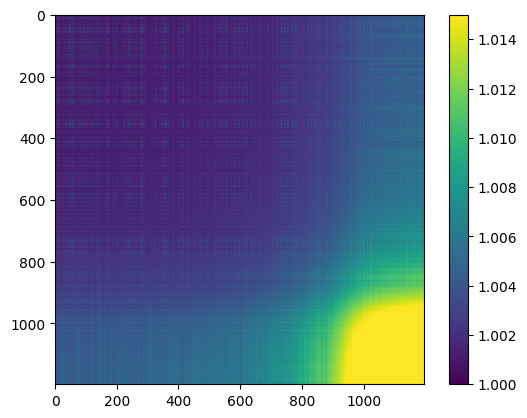

In [324]:
plt.imshow(diff, vmin=1.00, vmax=1.015)
plt.colorbar()

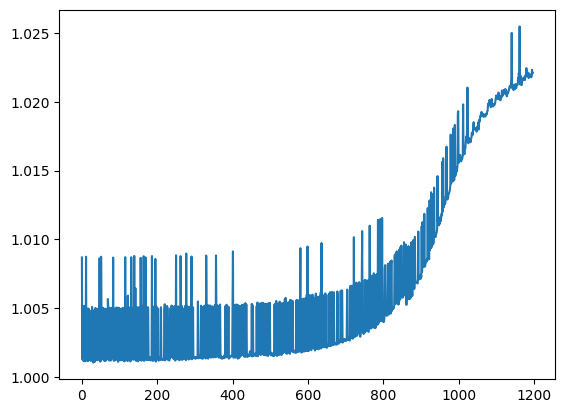

In [332]:
plt.plot(diff[np.diag_indices(diff.shape[0])])

In [319]:
u, s, v = np.linalg.svd(norm)

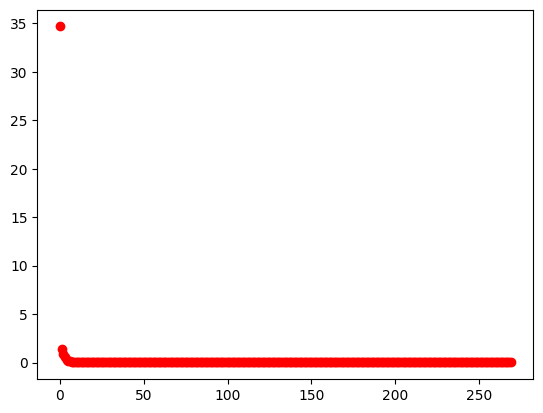

In [321]:
plt.plot(s, 'ro')

In [327]:
norm2 = u[:, 0:2] @ np.diag(s[0:2]) @ v[0:2]

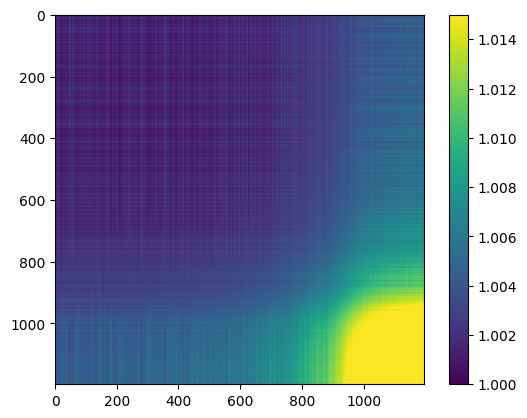

In [328]:
plt.imshow(norm2 @ norm2.T, vmin=1.00, vmax=1.015)
plt.colorbar()


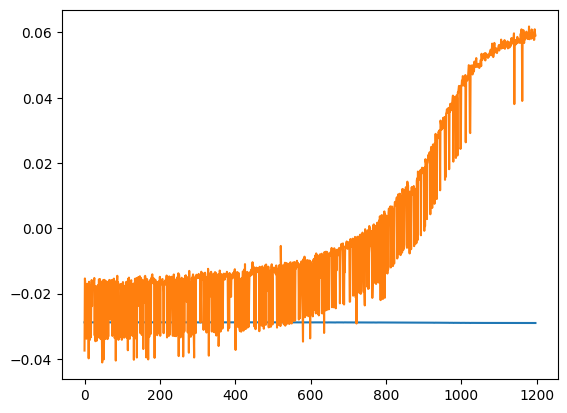

In [329]:
plt.plot(u[:, 0])
plt.plot(u[:, 1])

In [330]:
print(norm.shape)

(1198, 270)
